In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv('Boston.csv', index_col=0)

In [9]:
# Find which variable is the best predictor
def predictor(response):
    max_corr = 0
    max_corr_col = ''
    for col in df.columns:
        corr = abs(np.corrcoef(df[col], df[response])[0,1])
        if col != response and corr > max_corr:
            max_corr = corr
            max_corr_col = col
    return max_corr_col

In [10]:
# OLS regression for nox
def regression_OLS(predictor, response):
    X = df[predictor]  # predictor (independent variable)
    y = df[response]  # response (dependent variable)
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    lr_model = sm.OLS(y, X).fit() 
    print(lr_model.summary())
    return y,lr_model
    
predictor_nox = predictor('nox')
y_nox,lr_model_nox = regression_OLS(predictor_nox, 'nox')

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     730.4
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          4.23e-100
Time:                        17:37:05   Log-Likelihood:                 599.69
No. Observations:                 506   AIC:                            -1195.
Df Residuals:                     504   BIC:                            -1187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7153      0.007    105.257      0.0

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           5.08e-88
Time:                        17:37:09   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

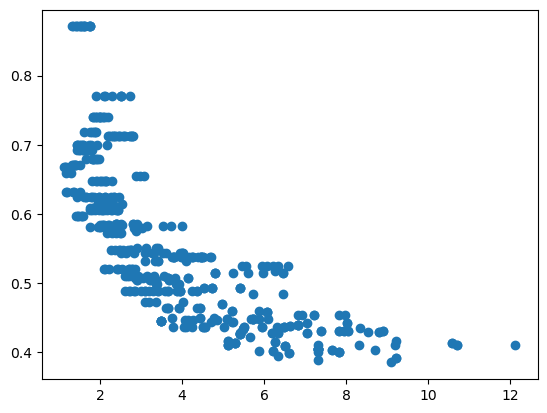

In [11]:
# According to the regression results, the equation is nox = 0.7153 + -0.0423*dis

plt.scatter(df[predictor_nox], y_nox)

predictor_medv = predictor('medv')
y_medv,lr_model_medv = regression_OLS(predictor_medv, 'medv')

<Figure size 640x480 with 0 Axes>

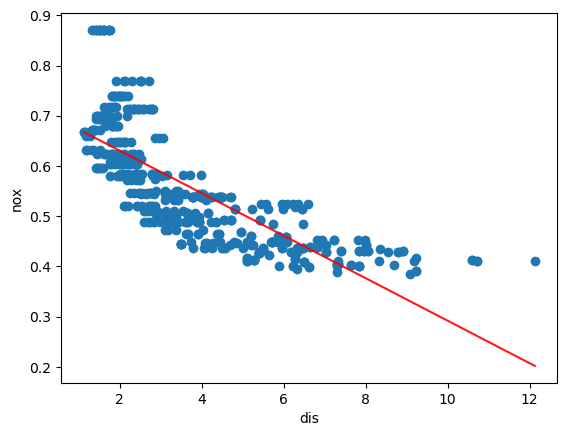

<Figure size 640x480 with 0 Axes>

In [12]:
# According to the regression results, the equation is medv =  34.5538 + -0.9500*lstat

# Plot for nox

# We pick 100 points equally spaced from the min to the max
X_prime_nox = np.linspace(df[predictor_nox].min(), df[predictor_nox].max(), 100)
X_prime_nox = sm.add_constant(X_prime_nox)  # Add a constant as we did before

# Now we calculate the predicted values
y_hat_nox = lr_model_nox.predict(X_prime_nox)

plt.scatter(df[predictor_nox], y_nox)  # Plot the raw data
plt.xlabel(predictor_nox)
plt.ylabel('nox')
plt.plot(X_prime_nox[:, 1], y_hat_nox, 'red', alpha=0.9)  # Add the regression line, colored in red

plt.figure() # Plot for medv

In [13]:
# We pick 100 points equally spaced from the min to the max
X_prime_medv = np.linspace(df[predictor_medv].min(), df[predictor_medv].max(), 100)
X_prime_medv = sm.add_constant(X_prime_medv)  # Add a constant as we did before

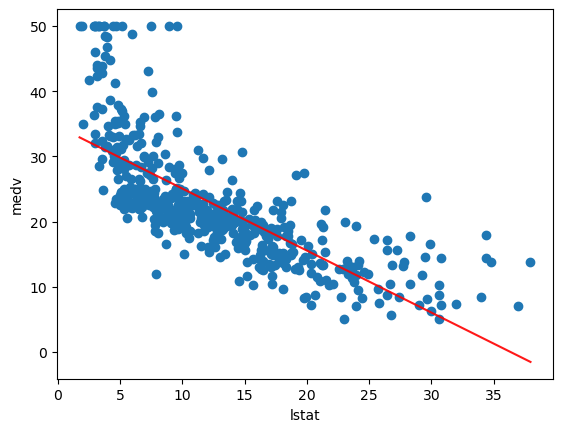

In [14]:
# Now we calculate the predicted values
y_hat_medv = lr_model_medv.predict(X_prime_medv)

plt.scatter(df[predictor_medv], y_medv)  # Plot the raw data
plt.xlabel(predictor_medv)
plt.ylabel('medv')
plt.plot(X_prime_medv[:, 1], y_hat_medv, 'red', alpha=0.9)  # Add the regression line, colored in red
plt.show()